### Aluna: Cristiane Brasil Ueda 

# Exercício 2.2

Para cada uma das seguintes funções:

Calcular o gradiente.
Calcular o hessiano.
Especificar (e justificar) se a função é convexa, côncava ou nenhuma das duas.
Calcular a curvatura da função numa direção d no ponto especificado x
Fazer uma mudança de variáveis para pré-condicionar a função, usando o hessiano no ponto especificado x
Nota: A matriz para a mudança de variáveis deve ser definida positiva.

$$
f(x_1, x_2) = x_1^2 + 2x_1x_2 + 2x_2^2, \quad \bar{x} = (1, 1)^{\top}
$$


In [4]:
import sympy as sp

# Definir variáveis simbólicas
x1, x2 = sp.symbols('x1 x2')
x = sp.Matrix([x1, x2])

# Definir a função
f = x1**2 + 2*x1*x2 + 2*x2**2

# 1. Gradiente
grad_f = sp.Matrix([sp.diff(f, var) for var in x])
print("Gradiente:")
sp.pprint(grad_f)

# 2. Hessiano
hessian_f = sp.hessian(f, x)
print("\nHessiano:")
sp.pprint(hessian_f)

# 3. Convexidade
eigenvals = hessian_f.eigenvals()
print("\nAutovalores do Hessiano (para testar convexidade):")
sp.pprint(eigenvals)

# 4. Curvatura na direção d no ponto x = (1, 1)
x_bar = {x1: 1, x2: 1}
d = sp.Matrix([1, 0])  # direção ao longo de x1

curvatura = (d.T * hessian_f.subs(x_bar) * d)[0]
print("\nCurvatura na direção d = [1, 0] no ponto x̄ = (1,1):")
sp.pprint(curvatura)

# 5. Mudança de variáveis - pré-condicionamento
H_at_xbar = hessian_f.subs(x_bar)
L = H_at_xbar.cholesky()
print("\nMatriz de pré-condicionamento (Cholesky do Hessiano):")
sp.pprint(L)


Gradiente:
⎡2⋅x₁ + 2⋅x₂⎤
⎢           ⎥
⎣2⋅x₁ + 4⋅x₂⎦

Hessiano:
⎡2  2⎤
⎢    ⎥
⎣2  4⎦

Autovalores do Hessiano (para testar convexidade):
{3 - √5: 1, √5 + 3: 1}

Curvatura na direção d = [1, 0] no ponto x̄ = (1,1):
2

Matriz de pré-condicionamento (Cholesky do Hessiano):
⎡√2  0 ⎤
⎢      ⎥
⎣√2  √2⎦


In [6]:
import numpy as np
def ex0214(x):
    f = 0.5 * x[0] * x[0] + 2.0 * x[1] * x[1]
    g = np.array([x[0], 4.0 * x[1]])
    h = None
    return f, g, h

Avalie a função em:

$$
x = \begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$


In [7]:
x = np.array([1, 1])
f, g, h = ex0214(x)

In [8]:
print(f)

2.5


In [9]:
print(g)

[1. 4.]


Para plotar a função, não precisamos do gradiente. Portanto, encapsulamos a função acima em outra função fct que retorna apenas o valor da função.

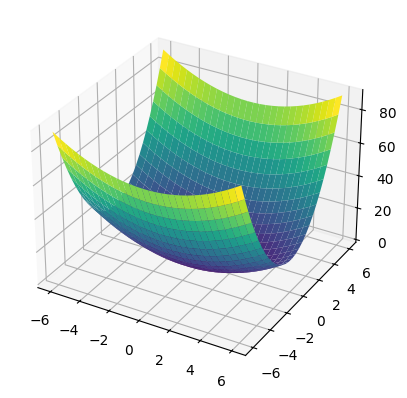

In [10]:
def fct(x, y):
    f,_ , _ = ex0214(np.array([x, y]))
    return f

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
meshx = np.linspace(-6, 6, 30)
meshy = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(meshx, meshy)
Z = fct(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

Investigamos a forma da função ao longo de várias direções. Definimos três direções.

In [11]:
d1 = -g
d2 = np.array([-1, -1])
d3 = np.array([1, -3])

Traçamos a função ao longo das três direções

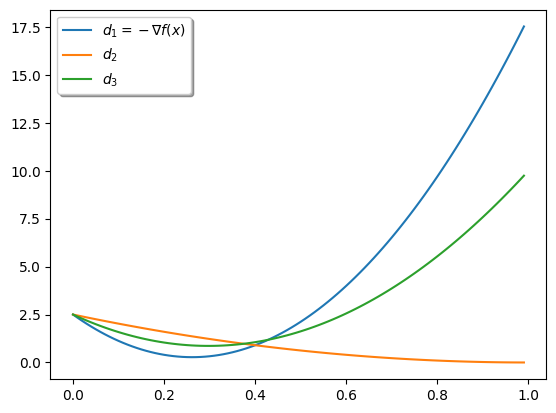

In [12]:
plotalpha = np.arange(0, 1, 0.01)
fig, ax = plt.subplots()
fx1 = np.array([ex0214(x + alpha * d1)[0] for alpha in plotalpha])
fx2 = np.array([ex0214(x + alpha * d2)[0] for alpha in plotalpha])
fx3 = np.array([ex0214(x + alpha * d3)[0] for alpha in plotalpha])
plot1, plot2, plot3 = plt.plot(plotalpha,
                               fx1,
                               plotalpha,
                               fx2,
                               plotalpha,
                               fx3)
ax.legend((plot1,plot2,plot3),
          ('$d_1=-\\nabla f(x)$', '$d_2$', '$d_3$'), \
              loc='upper left', shadow=True)

Calcule as derivadas direcionais de f em x ao longo de cada direção

Ao longo de d1: -17.0 

Ao longo de d2: -5.0

Ao longo de d3: -11.0

Visualização gráfica do problema acima

In [76]:
ex0214(x0)

(np.float64(2.5),
 array([1., 4.]),
 array([[1., 0.],
        [0., 4.]]))

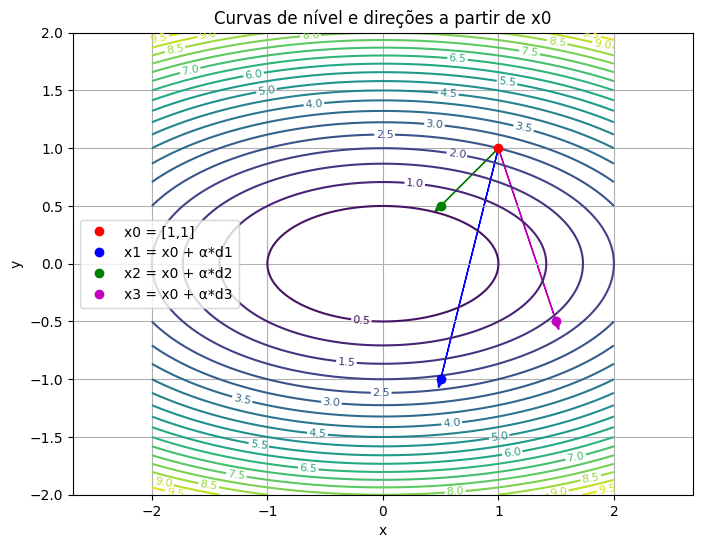

In [43]:
# Parâmetros
x0 = np.array([1.0, 1.0])
_, g, _ = ex0214(x0)  # Supondo que 'ex0214' retorna a função, o gradiente e a Hessiana
alpha = 0.5  # Tamanho do passo

# Direções
d1 = -g  # Direção do gradiente descendente
d2 = np.array([-1.0, -1.0])  # Direção arbitrária 1
d3 = np.array([1.0, -3.0])   # Direção arbitrária 2

# Novos pontos após o passo
x1 = x0 + alpha * d1
x2 = x0 + alpha * d2
x3 = x0 + alpha * d3

# Grade para o gráfico de contorno
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * X**2 + 2.0 * Y**2  # Função de exemplo para plotar as curvas de nível

# Plotagem
plt.figure(figsize=(8, 6))
contornos = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(contornos, inline=True, fontsize=8)

# Pontos inicial e resultantes
plt.plot(x0[0], x0[1], 'ro', label='x0 = [1,1]')
plt.plot(x1[0], x1[1], 'bo', label='x1 = x0 + α*d1')
plt.plot(x2[0], x2[1], 'go', label='x2 = x0 + α*d2')
plt.plot(x3[0], x3[1], 'mo', label='x3 = x0 + α*d3')

# Seta indicando as direções
plt.arrow(x0[0], x0[1], alpha * d1[0], alpha * d1[1], color='b', head_width=0.05)
plt.arrow(x0[0], x0[1], alpha * d2[0], alpha * d2[1], color='g', head_width=0.05)
plt.arrow(x0[0], x0[1], alpha * d3[0], alpha * d3[1], color='m', head_width=0.05)

plt.title('Curvas de nível e direções a partir de x0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


Exemplo 2.23 (Curvatura). A curvatura da função em diferentes direções é dada abaixo.

In [81]:
def ex0214(x):
    f = 0.5 * x[0] * x[0] + 2.0 * x[1] * x[1]
    g = np.array([x[0], 4.0 * x[1]])
    h = np.array([[1.0, 0.0], [0.0, 4.0]])
    return f, g, h

x = np.array([1, 1])
f, g, h = ex0214(x)

In [82]:
d = np.array([1, 4])
(d @ h @ d) / (d @ d)

np.float64(3.823529411764706)

In [83]:
d = np.array([1,1])
(d @ h @ d) / (d @ d)

np.float64(2.5)

In [84]:
d = np.array([-1,3])
(d @ h @ d) / (d @ d)

np.float64(3.7)

Exemplo 2.31 (Condicionamento). A função quadrática

In [85]:
def ex0231(x):
    f = 2.0*x[0]**2 + 9.0*x[1]**2
    g = np.array([4.0*x[0], 18.0*x[1]])
    h = np.array([[4.0, 0.0], [0.0, 18.0]])
    return f, g, h
x0 = np.array([0., 0.])
_, _, h = ex0231(x0)

In [86]:
# Calcula os valores singulares
valores_singulares = np.linalg.svd(h, compute_uv=False)

# Calcula o número de condição como sigma_1 / sigma_n
numero_de_condicao = valores_singulares[0] / valores_singulares[-1]
numero_de_condicao


np.float64(4.5)

In [87]:
# Aplicando mudança de variáveis
def ex0231_b(x):
    f = 0.5 * x[0]**2 + 0.5 * x[1]**2               # Função objetivo
    g = np.array([1.0 * x[0], 1.0 * x[1]])          # Gradiente
    h = np.array([[1.0, 0.0], [0.0, 1.0]])          # Hessiana (matriz identidade)
    return f, g, h

_, _, h = ex0231_b(x0)  # Avalia a função na posição x0
valores_singulares = np.linalg.svd(h, compute_uv=False)  # Calcula os valores singulares da Hessiana
numero_de_condicao = valores_singulares[0] / valores_singulares[-1]  # Número de condição
numero_de_condicao


np.float64(1.0)

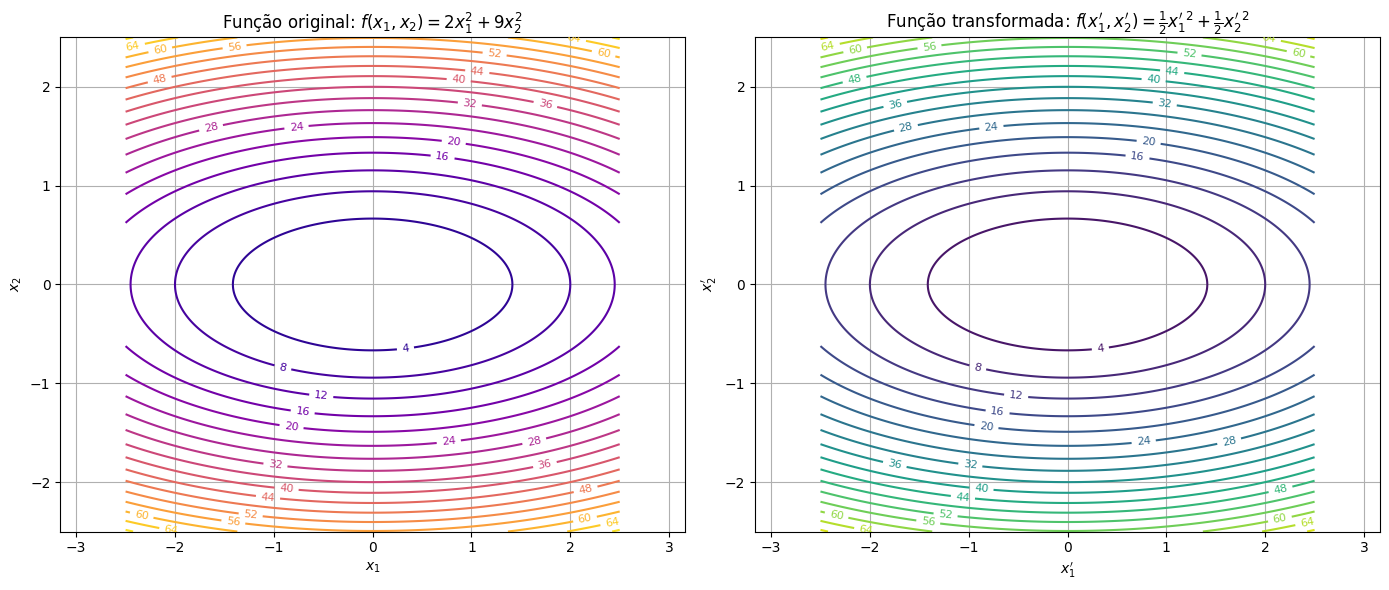

In [55]:
# Função original
def f_original(x1, x2):
    return 2.0 * x1**2 + 9.0 * x2**2

# Função transformada (após substituição de variáveis)
def f_transformada(x1p, x2p):
    return 0.5 * x1p**2 + 0.5 * x2p**2

# Geração da malha para o gráfico
valores_x = np.linspace(-2.5, 2.5, 400)
valores_y = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(valores_x, valores_y)

# Contornos da função original
Z_original = f_original(X, Y)

# Mudança de variáveis
X1p = 2 * X
X2p = 3 * np.sqrt(2) * Y

# Contornos da função transformada
Z_transformada = f_transformada(X1p, X2p)

# Plotagem
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Função original
cs1 = axs[0].contour(X, Y, Z_original, levels=20, cmap='plasma')
axs[0].clabel(cs1, inline=True, fontsize=8)
axs[0].set_title("Função original: $f(x_1, x_2) = 2x_1^2 + 9x_2^2$")
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].axis('equal')
axs[0].grid(True)

# Função transformada
cs2 = axs[1].contour(X, Y, Z_transformada, levels=20, cmap='viridis')
axs[1].clabel(cs2, inline=True, fontsize=8)
axs[1].set_title("Função transformada: $f(x_1', x_2') = \\frac{1}{2}x_1'^2 + \\frac{1}{2}x_2'^2$")
axs[1].set_xlabel("$x_1'$")
axs[1].set_ylabel("$x_2'$")
axs[1].axis('equal')
axs[1].grid(True)

plt.tight_layout()
plt.show()


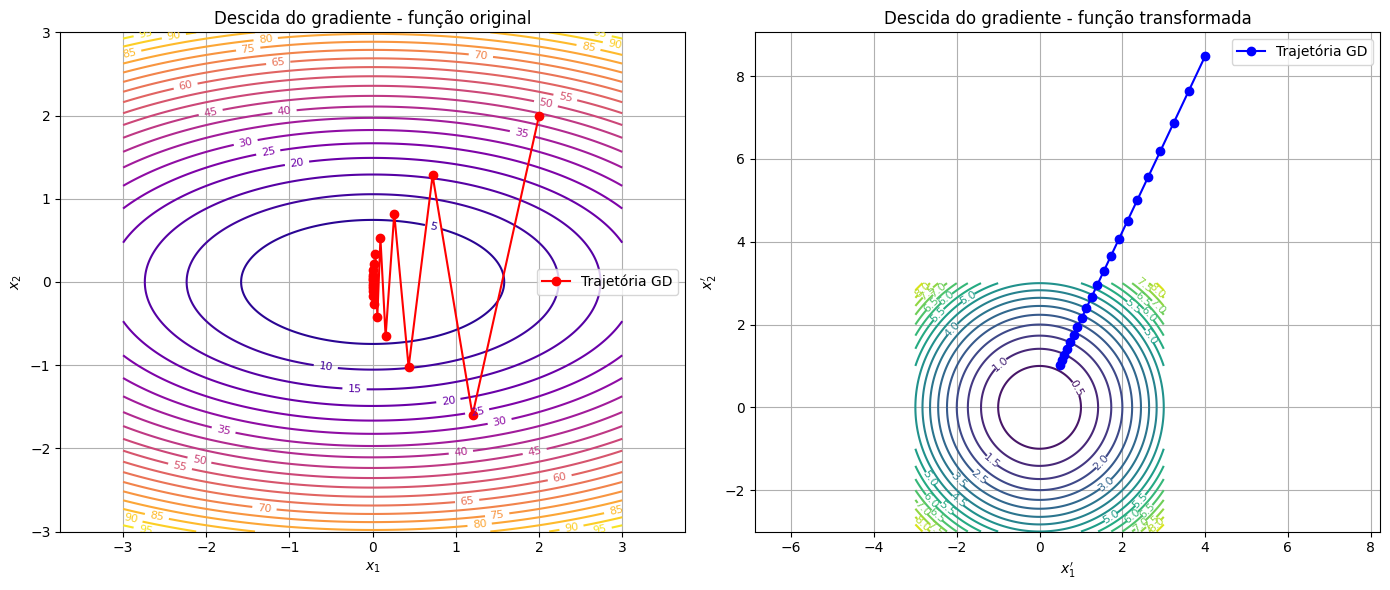

In [22]:
# Ponto inicial
x0 = np.array([2.0, 2.0])  # mesmo ponto de partida nos dois casos
alpha = 0.1  # passo fixo
n_steps = 20  # número de iterações

# Gradiente da função original
def grad_f_original(x):
    return np.array([4.0 * x[0], 18.0 * x[1]])

# Caminho de gradiente descendente para função original
x_orig = [x0.copy()]
x = x0.copy()
for _ in range(n_steps):
    x = x - alpha * grad_f_original(x)
    x_orig.append(x.copy())
x_orig = np.array(x_orig)

# Mudança de coordenadas: x' = T x
T = np.array([[2.0, 0.0], [0.0, 3.0 * np.sqrt(2)]])
T_inv = np.linalg.inv(T)

# Caminho transformado: em coordenadas x'
x0p = T @ x0
def grad_f_transf(xp):
    return np.array([xp[0], xp[1]])  # gradiente da função esférica 0.5 x'^T x'

x_transf = [x0p.copy()]
x = x0p.copy()
for _ in range(n_steps):
    x = x - alpha * grad_f_transf(x)
    x_transf.append(x.copy())
x_transf = np.array(x_transf)

# Curvas de nível para plotagem
x_vals = np.linspace(-3, 3, 400)
y_vals = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z_orig = f_original(X, Y)
Z_transf = f_transformed(X, Y)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Original
cs1 = axs[0].contour(X, Y, Z_orig, levels=20, cmap='plasma')
axs[0].clabel(cs1, inline=True, fontsize=8)
axs[0].plot(x_orig[:, 0], x_orig[:, 1], 'ro-', label='Trajetória GD')
axs[0].set_title("Descida do gradiente - função original")
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].legend()
axs[0].axis('equal')
axs[0].grid(True)

# Transformada
cs2 = axs[1].contour(X, Y, Z_transf, levels=20, cmap='viridis')
axs[1].clabel(cs2, inline=True, fontsize=8)
axs[1].plot(x_transf[:, 0], x_transf[:, 1], 'bo-', label='Trajetória GD')
axs[1].set_title("Descida do gradiente - função transformada")
axs[1].set_xlabel("$x_1'$")
axs[1].set_ylabel("$x_2'$")
axs[1].legend()
axs[1].axis('equal')
axs[1].grid(True)

plt.tight_layout()
plt.show()


Ela corresponde às quatro funções do Exercício 2.2 do livro.

Considere $f:\mathbb{R}^2 \to \mathbb{R}$ definida por 

$$
f(x) = \frac{1}{3}x_1^3 + x_2^3 - x_1 - x_2
$$


Ela corresponde à segunda função do Exercício 2.2 do livro.

Seu gradiente é

$$
\nabla f(x) = \begin{pmatrix}
x_1^2 - 1 \\
3x_2^2 - 1
\end{pmatrix}
$$


Sua hessiana é

$$
\nabla^2 f(x) = \begin{pmatrix}
2x_1 & 0 \\
0 & 6x_2
\end{pmatrix}.
$$


In [59]:
import numpy as np
def function4(x):
    f = x[0]**3 / 3 + x[1]**3 - x[0] - x[1]
    g = np.array([ x[0] * x[0] - 1, 3 * x[1] * x[1] - 1])
    h = np.array([[2 * x[0], 0], [0, 6 * x[1]]])
    return f, g, h

Avalie a função em

$$
x = \begin{pmatrix}
9 \\
1
\end{pmatrix}.
$$


In [60]:
x = np.array([9, 1])
f, g, h = function4(x)

In [61]:
print(f)

234.0


In [62]:
print(g)

[80  2]


In [63]:
print(h)

[[18  0]
 [ 0  6]]


Para plotar a função, primeiro importamos as bibliotecas.

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

Então escrevemos um wrapper que retorna apenas o valor da função.

In [65]:
def fplot(x, y):
    npx = np.array([x, y])
    return function4(npx)[0]

Por fim, plotamos a função para um intervalo de valores de $x_1$ e $x_2$.

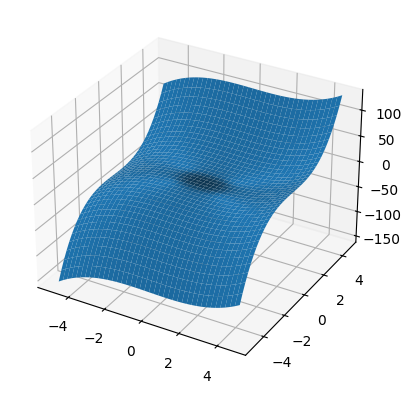

In [66]:
x1 = np.arange(-5, 5, 0.25)
x2 = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x1, x2)
Z = np.array([[fplot(x, y) for x in x1] for y in x2])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)

Considere a direção

$$
d = \begin{pmatrix}
-1 \\
-1
\end{pmatrix},
$$


e

$$
g(\alpha) = f(x + \alpha d),
$$


A função unidimensional de x ao longo de d

In [67]:
d = np.array([-1, -1])
def onedimension(alpha):
    thex = x + alpha * d
    return function4(thex)[0]

Trace o gráfico dessa função.

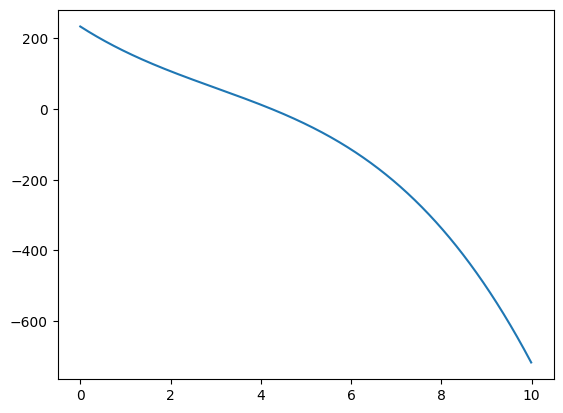

In [68]:
plotalpha = np.arange(0, 10, 0.01)
fx = np.array([onedimension(alpha) for alpha in plotalpha])
plt.plot(plotalpha, fx)

$$
\text{A derivada direcional é } \nabla f(x)^T d, \text{ onde } x = \begin{pmatrix} 9 \\ 1 \end{pmatrix}.
$$



In [69]:
print(np.inner(g, d))

-82


A curvatura é

$$
\frac{d^T H d}{d^T d},
$$


$$
 \text{ onde } x = \begin{pmatrix} 9 \\ 1 \end{pmatrix}.
$$


In [70]:
def curvature(h, d):
    return np.inner(d, h @ d) / np.inner(d, d)

In [71]:
print(curvature(h, d))

12.0


Calcular os autovalores e autovetores.

In [73]:
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(h)
eigenvalues


array([18.,  6.])

In [74]:
eigenvectors

array([[1., 0.],
       [0., 1.]])

A curvatura ao longo dos autovetores são os autovalores.

In [75]:
print(curvature(h, eigenvectors[0]))
print(curvature(h, eigenvectors[1]))

18.0
6.0
